

#*Trabajo Final  detección de fraudes *

# ***Conjuntos de datos financieros sintéticos para la detección de fraudes***

PaySim simula transacciones de dinero móvil basándose en una muestra de transacciones reales extraídas de un mes de registros financieros de un servicio de dinero móvil implementado en un país africano. Los registros originales fueron proporcionados por una empresa multinacional, proveedora del servicio financiero móvil, que actualmente opera en más de 14 países de todo el mundo.

Este conjunto de datos sintéticos se reduce a 1/4 del conjunto de datos original y se creó exclusivamente para Kaggle.

**NOTA:** Las transacciones que se detectan como fraude se cancelan, por lo que para la detección de fraudes estas columnas (oldbalanceOrg, newbalanceOrig, oldbalanceDest ) no debe utilizarse.

**Dataset:** https://www.kaggle.com/datasets/ealaxi/paysim1/data



## ***Importación de librerias***

In [ ]:
# Importamos las librerias necesarias para la EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn

Para Descargar el dataset debido al tamaño del mismo
https://drive.google.com/file/d/13S1XorZ-LIRt7D6kPnE7_m0E_0l8LZfL/view?usp=sharing

## ***Importación de la Base de Datos***

In [ ]:
# Importacion a la base de datos local
df = pd.read_csv('/content/dataSetFraudes.csv')

In [ ]:
   # Importacion a la base de datos usando drive
    # from google.colab import drive
     #drive.mount('/content/drive')
  #   df = pd.read_csv('/content/drive/MyDrive/dataSetFraudes.csv')

## ***Analisis de Dataset***

In [ ]:
# Analizo los datos de los primeros 10 registros
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
#Verifico el tipo de varibles que tengo
df.info()

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [ ]:
#Reviso los nulos
df.isnull().sum()

### En este dataset NO hay nulos debido a que la informacion es la muestra de transacciones reales

In [ ]:
# Analizo la cantidad de filas y columnas
df.shape

(6362620, 11)

### Tengo:
- Filas: 6362620
- Columnas: 11


In [ ]:
# Nombre de las columnas
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## **Explicación de cabeceras**

Esta es una muestra de 1 fila con explicación de cabeceras:

1,PAYMENT,1060.31,C429214117,1089.089,28.69,M1591654462,0.0,0,0

**step:** *mapea una unidad de tiempo en el mundo real. En este caso 1 step es 1 hora de tiempo. Pasos totales 744 (31 días de simulación).*

**type:** CASH-IN, CASH-OUT, DEBIT, PAYMENT y TRANSFER.

**amount:** *cantidad de la transacción en moneda local.*

**nameOrig:** *cliente que inició la transacción*

**oldbalanceOrg**: *saldo inicial antes de la transacción*

**newbalanceOrig:** *nuevo saldo después de la transacción.*

**nameDest:** *cliente que es el destinatario de la transacción*

**oldbalanceDest:** *receptor inicial de saldo antes de la transacción. Tenga en cuenta que no hay información para los clientes que comiencen con M (Merchants).*

**newbalanceDest:** *nuevo receptor de saldo después de la transacción. Tenga en cuenta que no hay información para los clientes que comiencen con M (Merchants).*

**isFraud:** *Estas son las transacciones realizadas por los agentes fraudulentos dentro de la simulación. En este conjunto de datos específico el comportamiento fraudulento de los agentes pretende beneficiarse tomando el control o las cuentas de los clientes y tratar de vaciar los fondos transfiriendo a otra cuenta y luego sacar el dinero del sistema.*

**isFlaggedFraud:** *El modelo de negocio tiene como objetivo controlar las transferencias masivas de una cuenta a otra y marca intentos ilegales. Un intento ilegal en este conjunto de datos es un intento de transferir más de 200.000 en una sola transacción.*


# ⚠️ IMPORTANTE ⚠️
**Como en las transacciones fraudulentas se cancelan los movimientos, ningún valor de balance es confiable para predecir el fraude, ya que fue alterado por el simulador despues de la detección del fraude.**

In [ ]:
# Vamos a eliminar todas las columnas de balance

df_mod = df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)
df_mod

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,0
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,0
2,1,TRANSFER,181.00,C1305486145,C553264065,1,0
3,1,CASH_OUT,181.00,C840083671,C38997010,1,0
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0,0
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,C776919290,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,C1881841831,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,C1365125890,1,0
6362618,743,TRANSFER,850002.52,C1685995037,C2080388513,1,0


In [ ]:
# Analizo la variable Fraude en proporcion
df['isFraud'].value_counts(normalize=True)


,proportion
isFraud,
0,0.998709
1,0.001291


In [ ]:
# Grafica por tipo y fraude
sns.countplot(data=df_mod, x='type', hue='isFraud')
plt.title("Transacciones por tipo y si son fraude o no")
plt.xticks(rotation=45)
plt.show()

### Detectamos que hay un desbalance considerable entre lo que esta etiquetado como
- 1 = Fraude
- 0 = No Fraude

In [ ]:
# Verificamos los tipos de transacción
df_mod['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [ ]:
# Filtramos fraude por tipo de transacción
fraude_tipo_porcentaje = df_mod.groupby('type')['isFraud'].mean().sort_values(ascending=False)
print(fraude_tipo_porcentaje)



type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


### Vemos que los fraudes estan concentrados en 2 tipos de transacciones
- TRANSFER =   0.007688
- CASH_OUT =   0.001840



### Cuento la cantidad de transacciones fraudulentas que tienen estos 2 tipos

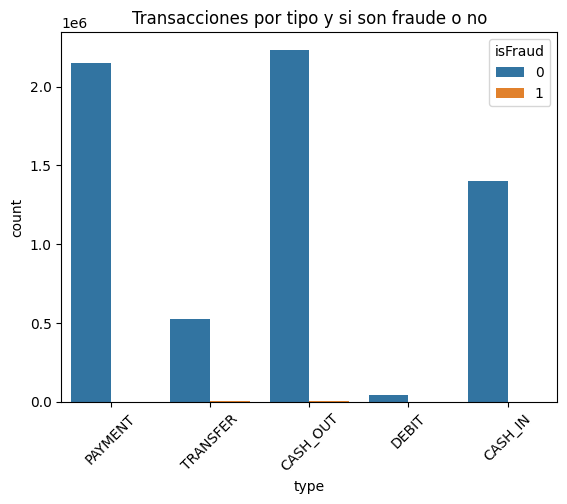

In [ ]:
fraude_x_tipo = df_mod[df_mod['isFraud'] == 1].groupby('type')['isFraud'].count().sort_values(ascending=False)
print(fraude_x_tipo)

### Vamos a confirmar ésto graficamente

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=fraude_x_tipo.values, y=fraude_x_tipo.index, palette='Reds_r')

# Quitar recuadro superior y derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir etiquetas
for i, v in enumerate(fraude_x_tipo.values):
    plt.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Cantidad de fraudes por tipo de transacción')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
# Analizo la diferencia de los montos que hay "con fraude" y "sin fraude"
df_mod.groupby('isFraud')['amount'].mean().round(2)

,amount
isFraud,
0,1.781970e+05
1,1.467967e+06


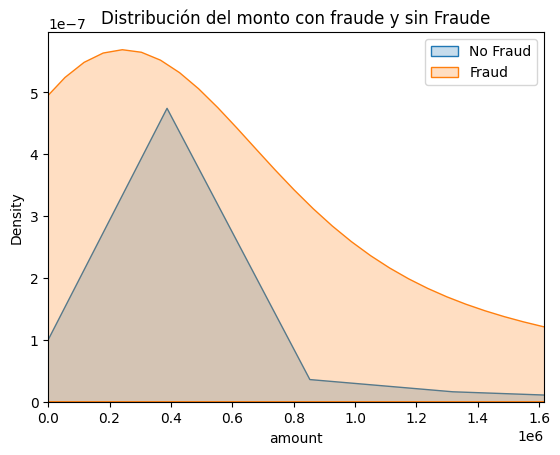

In [ ]:
#Grafico de Disribucion de montos con fraude y sin Fraude
sns.kdeplot(data=df_mod[df_mod['isFraud'] == 0], x='amount', label='No Fraud', fill=True)
sns.kdeplot(data=df_mod[df_mod['isFraud'] == 1], x='amount', label='Fraud', fill=True)
plt.xlim(0, df_mod['amount'].quantile(0.99))  # evitamos top 1% para verlo más expandido al grafico
plt.title("Distribución del monto con fraude y sin Fraude")
plt.legend()
plt.show()

### En relación al tiempo voy a analizar por dia como:
- 1 step= 1 hs
- 24 steps = 1 dia
### voy a agregar una columna dia a un nuevo dataframe para ver en lapso de dias cuando hay más fraude

In [ ]:
# CReo copia
df_mod_col = df_mod.copy()

# Crear columna 'dia' condicionalmente para graficar
df_mod_col['dia'] = df_mod_col.apply(lambda row: round(row['step'] / 24, 0) if row['isFraud'] == 1 else 0, axis=1)

df_mod_col.tail()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,dia
6362615,743,CASH_OUT,339682.13,C786484425,C776919290,1,0,31.0
6362616,743,TRANSFER,6311409.28,C1529008245,C1881841831,1,0,31.0
6362617,743,CASH_OUT,6311409.28,C1162922333,C1365125890,1,0,31.0
6362618,743,TRANSFER,850002.52,C1685995037,C2080388513,1,0,31.0
6362619,743,CASH_OUT,850002.52,C1280323807,C873221189,1,0,31.0


<Axes: xlabel='isFraud', ylabel='dia'>

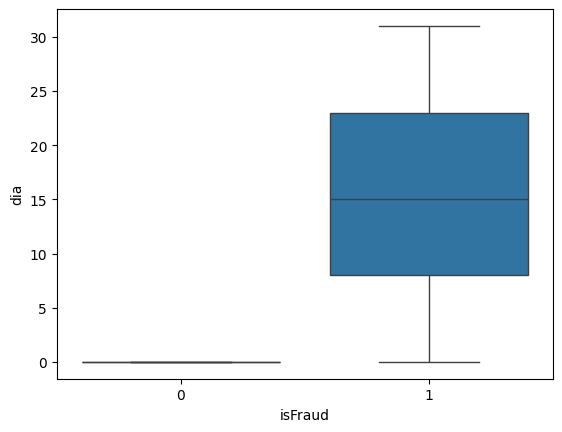

In [ ]:

sns.boxplot(x= df_mod_col['isFraud'],y=df_mod_col['dia'])

### Aproximadamente del dia 7 al 23 es donde se concentran los fraudes

### Hago una revision por rango de días y monto

In [82]:
df_prueba = df_mod_col.copy()
bins = [0, 5, 10, 15, 20, 25, 31]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-31']

# Paso 2: Crear columna 'rango_dia' con pd.cut()
df_prueba['rango_dia'] = pd.cut(df_prueba['dia'], bins=bins, labels=labels, right=True)



fraudes_por_rango = (
    df_prueba[df_prueba['isFraud'] == 1]
    .groupby('rango_dia')['amount']
    .sum()
    .reset_index(name='monto_fraude')
)

fraudes_por_rango


<ipython-input-82-8e72f6771e7a>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rango_dia')['amount']


,rango_dia,monto_fraude
0,1-7,2.502161e+09
1,8-14,2.599803e+09
2,15-21,3.143392e+09
3,22-31,3.725726e+09


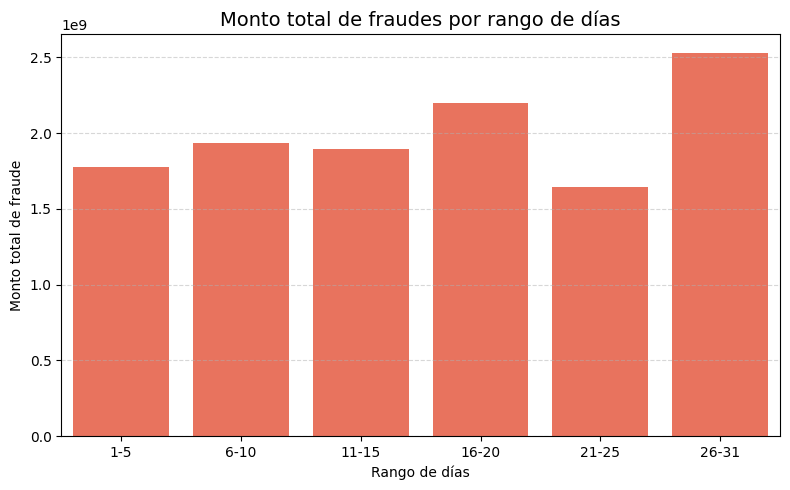

In [87]:
plt.figure(figsize=(8, 5))
sns.barplot(data=fraudes_por_rango, x='rango_dia', y='monto_fraude', color='tomato')

plt.title('Monto total de fraudes por rango de días', fontsize=14)
plt.xlabel('Rango de días')
plt.ylabel('Monto total de fraude')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Gráfico evolución del monto de fraude por días

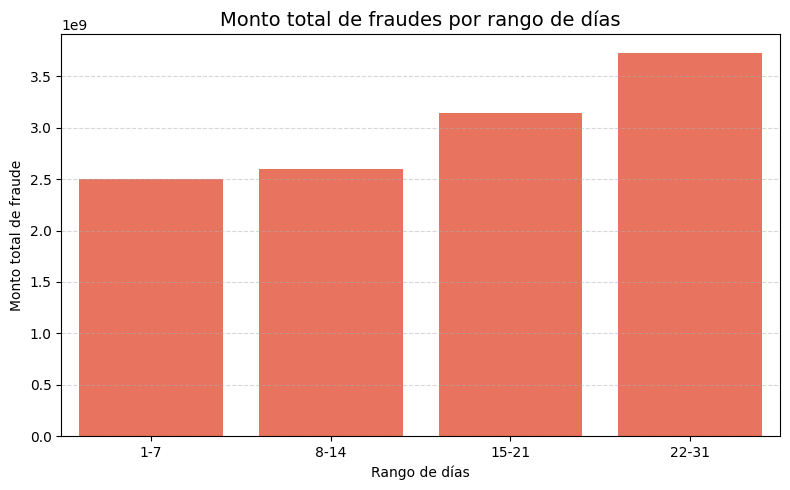

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=fraudes_por_rango, x='rango_dia', y='monto_fraude', marker='o', color='steelblue')

plt.title('Evolución del monto de fraude por días', fontsize=14)
plt.xlabel('Rango de días')
plt.ylabel('Monto de fraude')
plt.grid(True)
plt.tight_layout()
plt.show()

### *Con estos gráficos surge la duda sobre la relación que hay entre monto y cantidad de Fraudes*

- *Debido a ésto vamos a combinar cantidad y monto para verlo en un gráfico*

In [85]:
cont_fraudes = (
    df_prueba[df_prueba['isFraud'] == 1]
    .groupby('rango_dia', observed=True)
    .size()
    .reset_index(name='cantidad_fraudes')
)

# Combinamos con el monto
fraudes_df = pd.merge(fraudes_por_rango, cont_fraudes, on='rango_dia')

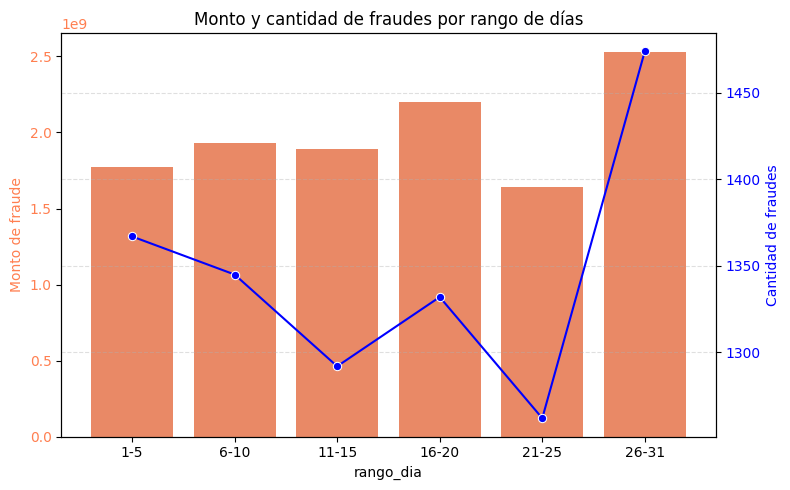

In [86]:
fig, ax1 = plt.subplots(figsize=(8, 5))

sns.barplot(data=fraudes_df, x='rango_dia', y='monto_fraude', color='coral', ax=ax1)
ax1.set_ylabel('Monto de fraude', color='coral')
ax1.tick_params(axis='y', labelcolor='coral')

# Eje secundario para cantidad
ax2 = ax1.twinx()
sns.lineplot(data=fraudes_df, x='rango_dia', y='cantidad_fraudes', marker='o', color='blue', ax=ax2)
ax2.set_ylabel('Cantidad de fraudes', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Monto y cantidad de fraudes por rango de días')
plt.xlabel('Rango de días')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Para que me quede mas claro voy a ver por dia la cantidad de fraudes y los montos

In [ ]:
df_only_fraude = df_mod_col[df_mod_col['isFraud'] == 1]

# Agrupamos por día
fraude_agrupado = (
    df_only_fraude.groupby('dia')
    .agg(monto_total=('amount', 'sum'), cantidad=('amount', 'count'))
    .reset_index()
)


array([0, 1])

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Monto total por día
sns.barplot(ax=axes[0], x='dia', y='monto_total', data=fraude_agrupado, color='coral')
axes[0].set_ylabel('Monto total')
axes[0].set_title('Monto total de fraudes por día')

# Cantidad de fraudes por día
sns.lineplot(ax=axes[1], x='dia', y='cantidad', data=fraude_agrupado, marker='o', color='navy')
axes[1].set_ylabel('Cantidad de fraudes')
axes[1].set_title('Cantidad de fraudes por día')
axes[1].set_xlabel('Día del mes')

plt.tight_layout()
plt.show()

### Verifico si hay algun rango horario que suceda más fraude

In [ ]:

# Como el dia tiene 24hs voy a crear una columna que tenga los mismos horarios pero de distintos dias
df_mod_col['hora'] = (df_mod_col['step'] % 24).astype(int)
df_mod_col.tail(15)

### Analizamos fraude por hora del día

In [ ]:
# Filtramos solo los fraudes
df_only_fraude = df_mod_col[df_mod_col['isFraud'] == 1]
# Agrupamos por hora
fraude_por_hora = (
    df_only_fraude.groupby('hora')
    .agg(cantidad_fraudes=('amount', 'count'), monto_total=('amount', 'sum'))
    .reset_index()
)

In [ ]:
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='hora', y='monto_total', data=fraude_por_hora, color='coral')

# Eje secundario para cantidad de fraudes
ax2 = ax1.twinx()
sns.lineplot(x='hora', y='cantidad_fraudes', data=fraude_por_hora, marker='o', color='steelblue', ax=ax2)

# Etiquetas
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Monto total de fraudes', color='coral')
ax2.set_ylabel('Cantidad de fraudes', color='steelblue')
plt.title('Fraudes por hora del día: Monto y Cantidad')

# Mejoras estéticas
ax1.tick_params(axis='y', labelcolor='coral')
ax2.tick_params(axis='y', labelcolor='steelblue')
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### *Los fraudes ocurren todo el día aunque las horas más criticas por monto son:*
- 2
- 3
- 8
- 10
- 14
- 21
- 22

### *La cantidad varia entre los dias:*
- 1 a 2
- 5 a 10
- 13 a 22

### Vamos a ver los montos que se manejan en cada horario de todas las transacciones

In [ ]:
df_only_fraude = df_mod_col[df_mod_col['isFraud'] == 1]
# Agrupamos por hora
fraude = (
    df_only_fraude.groupby('hora')
    .agg( monto=('amount', 'sum'))
    .reset_index()
)


# Filtramos solo los fraudes
df_sin_fraude = df_mod_col[df_mod_col['isFraud'] == 0]
# Agrupamos por hora
fraude_por_hora = (
    df_sin_fraude.groupby('hora')
    .agg(monto_total=('amount', 'sum'))
    .reset_index()
)


In [ ]:
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='hora', y='monto_total', data=fraude_por_hora, color='coral')

# Eje secundario para cantidad de fraudes
ax2 = ax1.twinx()
sns.lineplot(x='hora', y='monto', data=fraude, marker='o', color='steelblue', ax=ax2)

# Etiquetas
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Monto total de fraudes y no fraudes', color='coral')
ax2.set_ylabel('Monto de fraudes', color='steelblue')
plt.title('Fraudes y NO fraudes por hora del día: Montos')

# Mejoras estéticas
ax1.tick_params(axis='y', labelcolor='coral')
ax2.tick_params(axis='y', labelcolor='steelblue')
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

----------------
### Con esta informacion vamos a visualizar como se distribuyen los fraudes en dia y horario

In [ ]:
# Heatmap de monto total de fraudes por día y hora
pivot_monto = df_only_fraude.pivot_table(
    index='dia',
    columns='hora',
    values='amount',
    aggfunc='sum',
    fill_value=0
)

# Hacemos uno por cantidad:
pivot_cantidad = df_only_fraude.pivot_table(
    index='dia',
    columns='hora',
    values='isFraud',
    aggfunc='count',
    fill_value=0
)

### Monto total de fraudes por Día y Hora

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_monto, cmap="Reds", linewidths=0.5, linecolor='gray')
plt.title("Monto total de fraudes por Día y Hora")
plt.xlabel("Hora del día")
plt.ylabel("Día del mes")
plt.tight_layout()
plt.show()

### Cantidad de fraudes por Día y Hora

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_cantidad, cmap="Blues", linewidths=0.5, linecolor='gray')
plt.title("Cantidad de fraudes por Día y Hora")
plt.xlabel("Hora del día")
plt.ylabel("Día del mes")
plt.tight_layout()
plt.show()

### *Notamos un comportamiento extraño a las 12 del mediodia, debido a que hay un patron que se intercala pasando los días(un día hay cantidad de fraudes y al siguiente NO se registra ninguno). Vamos a tener esto en cuenta para futuros analisis.*

## Vamos a analizar los usuarios más comprometidos en los fraudes

In [ ]:
print('Top 10 de usuarios origen en fraudes: \n',df_mod_col[df_mod_col['isFraud'] == 1]['nameOrig'].value_counts().head(10))

print('\n\nTop 10 de destinos en fraudes: \n',df_mod_col[df_mod_col['isFraud'] == 1]['nameDest'].value_counts().head(10))


### Como observo que los usuarios origen(nameOrig) tienen una sola transaccion voy a revisar los montos

In [ ]:
# Usuario Origen
top_origen = (
    df_mod_col[df_mod_col['isFraud'] == 1]
    .groupby('nameOrig')
    .agg(
        cantidad_fraudes=('isFraud', 'count'),
        monto_total=('amount', 'sum')
    )
    .sort_values(by='monto_total', ascending=False)

)

print("Top 10 usuarios origen en fraudes (cantidad y monto):\n")
top_origen.head(10)


In [ ]:
# Usuario Origen
top_origen = (
    df_mod_col[df_mod_col['isFraud'] == 1]
    .groupby('nameOrig')
    .agg(
        cantidad_fraudes=('isFraud', 'count'),
        monto_total=('amount', 'sum')
    )
    .sort_values(by='monto_total', ascending=False)

)

print("Top 10 usuarios origen en fraudes (cantidad y monto):\n")
top_origen.head(10)


In [ ]:
#Los montos minimos , maximos, promedios , cantidad, porcentajes de Fraudes
df_only_fraude['amount'].describe().apply(lambda x:round(x,2))
